### Census Income Project

Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

### Importing liberary

In [2]:
#Data Lib
import numpy as np
import pandas as pd

#Visualization lib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Preprocessing lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#tunning lib
from sklearn.model_selection import GridSearchCV
#metrics

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#save

import pickle

import warnings
warnings.filterwarnings("ignore")

### Data Loading

In [4]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv',skipinitialspace = True)
data.sample(6)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
11649,17,Private,140117,10th,6,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K
25143,39,Private,215150,9th,5,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K
25431,48,Local-gov,148549,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
11829,28,Private,331381,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
18309,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K
27276,33,Private,137088,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,0,0,40,Ecuador,<=50K


In [5]:
data.shape

(32560, 15)

As we need to predict income and classify if its greater then 50 or less then 50. so lets convert this column in 1 & 0.

In [6]:
data['Income'].value_counts()

<=50K    24719
>50K      7841
Name: Income, dtype: int64

In [7]:
data['Income']=data['Income'].map({'<=50K':0,'>50K':1})

### Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


dataset have no null value but having few non numeric features

In [11]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [12]:
data[['Education','Education_num']].sample(10)

,Education,Education_num
8957,HS-grad,9
28472,Some-college,10
15605,HS-grad,9
256,HS-grad,9
29225,10th,6
30770,Assoc-voc,11
2222,7th-8th,4
13551,HS-grad,9
18255,Some-college,10
11767,HS-grad,9


Education & Education_num have same data in numeric & non-numeric type . so removing 'Education'.

In [13]:
data.drop('Education',inplace=True,axis=1)

In [14]:
data['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [15]:
data['Occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [12]:
data[data['Occupation']=='?']

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
60,32,?,293936,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
68,25,?,200681,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
76,67,?,212759,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,0
105,17,?,304873,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32530,30,?,33811,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32538,71,?,287372,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32540,41,?,202822,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


As feature 'Occupation' is important feature and in 1843 rows having '?',it means not data so removing these '?' 

In [16]:
data.drop(data[data['Occupation']=='?'].index,inplace=True)

In [17]:
data.shape

(30717, 14)

In [18]:
data['Marital_status'].value_counts()

Married-civ-spouse       14339
Never-married             9911
Divorced                  4258
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: Marital_status, dtype: int64

In [19]:
data['Relationship'].value_counts()

Husband           12704
Not-in-family      7864
Own-child          4525
Unmarried          3271
Wife               1435
Other-relative      918
Name: Relationship, dtype: int64

In [20]:
data['Race'].value_counts()

White                 26300
Black                  2909
Asian-Pac-Islander      974
Amer-Indian-Eskimo      286
Other                   248
Name: Race, dtype: int64

In [21]:
data['Sex'].value_counts()

Male      20787
Female     9930
Name: Sex, dtype: int64

In [22]:
data['Sex']=data['Sex'].map({'Male':1,'Female':0})

In [23]:
data['Native_country'].value_counts()

United-States                 27503
Mexico                          610
?                               556
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Iran                             42
Haiti                            42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                      

feature Native country also have few '?' as number very less so replacing them with mode country i.e. 'United-States'.

In [24]:
data['Native_country'].replace({'?':'United-States'},inplace=True)

### Encoding

Applying label encoding on country feature.

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
enc=LabelEncoder()

data['Native_country']=enc.fit_transform(data['Native_country'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30717 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30717 non-null  int64 
 1   Workclass       30717 non-null  object
 2   Fnlwgt          30717 non-null  int64 
 3   Education_num   30717 non-null  int64 
 4   Marital_status  30717 non-null  object
 5   Occupation      30717 non-null  object
 6   Relationship    30717 non-null  object
 7   Race            30717 non-null  object
 8   Sex             30717 non-null  int64 
 9   Capital_gain    30717 non-null  int64 
 10  Capital_loss    30717 non-null  int64 
 11  Hours_per_week  30717 non-null  int64 
 12  Native_country  30717 non-null  int32 
 13  Income          30717 non-null  int64 
dtypes: int32(1), int64(8), object(5)
memory usage: 3.4+ MB


In [28]:
data=pd.get_dummies(data,['Workclass','Marital_status','Occupation','Relationship','Race'])

In [29]:
data.shape

(30717, 48)

### Duplicacy Test

In [30]:
data.duplicated(keep='last').sum()

24

In [31]:
data.drop_duplicates(inplace=True)

In [32]:
data.shape

(30693, 48)

Found 24 duplicate observation which has removed now.

### Best Features selection

In [33]:
from sklearn.feature_selection import SelectKBest,f_classif,chi2
X=data.drop('Income',axis=1)
y=data.Income
best_features=SelectKBest(score_func=f_classif,k=25)

fit=best_features.fit(X,y)

scores=pd.DataFrame(fit.scores_)
scores['feature_name']=X.columns
scores.columns=['score','column_name']
scores.sort_values(by=['score'],ascending=False)

,score,column_name
17,7579.000427,Marital_status_Married-civ-spouse
36,5886.541058,Relationship_Husband
2,3874.131197,Education_num
19,3493.479096,Marital_status_Never-married
0,1916.620291,Age
6,1690.733252,Hours_per_week
39,1642.804959,Relationship_Own-child
4,1589.191337,Capital_gain
3,1511.147243,Sex
25,1447.689765,Occupation_Exec-managerial


In [34]:
scores.nlargest(25,'score').column_name

17    Marital_status_Married-civ-spouse
36                 Relationship_Husband
2                         Education_num
19         Marital_status_Never-married
0                                   Age
6                        Hours_per_week
39               Relationship_Own-child
4                          Capital_gain
3                                   Sex
25           Occupation_Exec-managerial
37           Relationship_Not-in-family
31            Occupation_Prof-specialty
29             Occupation_Other-service
5                          Capital_loss
40               Relationship_Unmarried
11               Workclass_Self-emp-inc
15              Marital_status_Divorced
41                    Relationship_Wife
10                    Workclass_Private
22              Occupation_Adm-clerical
27         Occupation_Handlers-cleaners
44                           Race_Black
38          Relationship_Other-relative
46                           Race_White
28         Occupation_Machine-op-inspct


selecting top 25 features with highest score.

In [35]:
New_X=data[scores.nlargest(25,'score').column_name]

In [36]:
data=pd.concat([New_X,y],axis=1)

### Correlation & Multicollinearity Test

In [37]:
data.corr()

,Marital_status_Married-civ-spouse,Relationship_Husband,Education_num,Marital_status_Never-married,Age,Hours_per_week,Relationship_Own-child,Capital_gain,Sex,Occupation_Exec-managerial,...,Marital_status_Divorced,Relationship_Wife,Workclass_Private,Occupation_Adm-clerical,Occupation_Handlers-cleaners,Race_Black,Relationship_Other-relative,Race_White,Occupation_Machine-op-inspct,Income
Marital_status_Married-civ-spouse,1.000000,0.896266,0.081100,-0.645616,0.308445,0.222114,-0.373177,0.085635,0.435755,0.105137,...,-0.375553,0.233513,-0.127954,-0.153864,-0.054505,-0.125897,-0.118729,0.105940,0.014828,0.445017
Relationship_Husband,0.896266,1.000000,0.074354,-0.579414,0.306945,0.253565,-0.349133,0.079512,0.580396,0.098610,...,-0.337044,-0.186035,-0.122425,-0.191619,-0.041458,-0.125987,-0.147498,0.116155,0.016238,0.401165
Education_num,0.081100,0.074354,1.000000,-0.030505,0.043240,0.151556,-0.097392,0.124281,0.007323,0.201059,...,-0.007859,0.032740,-0.164334,-0.002722,-0.136430,-0.072600,-0.091534,0.049603,-0.169513,0.334787
Marital_status_Never-married,-0.645616,-0.579414,-0.030505,1.000000,-0.524553,-0.210896,0.495955,-0.066751,-0.175064,-0.105394,...,-0.276753,-0.152757,0.136536,0.079574,0.085654,0.071376,0.111742,-0.066746,-0.021118,-0.319679
Age,0.308445,0.306945,0.043240,-0.524553,1.000000,0.101632,-0.420417,0.080398,0.081969,0.111041,...,0.136353,0.024437,-0.210989,-0.042246,-0.103382,-0.015425,-0.069492,0.029158,-0.014637,0.242442
Hours_per_week,0.222114,0.253565,0.151556,-0.210896,0.101632,1.000000,-0.262105,0.079544,0.230187,0.131667,...,0.018446,-0.061816,-0.095650,-0.105753,-0.054408,-0.058554,-0.050046,0.052851,-0.004412,0.228501
Relationship_Own-child,-0.373177,-0.349133,-0.097392,0.495955,-0.420417,-0.262105,1.000000,-0.052375,-0.103322,-0.098385,...,-0.084564,-0.092045,0.109505,0.060553,0.096349,0.019718,-0.072978,-0.017509,-0.011768,-0.225406
Capital_gain,0.085635,0.079512,0.124281,-0.066751,0.080398,0.079544,-0.052375,1.000000,0.047763,0.060241,...,-0.019080,0.018854,-0.048587,-0.030473,-0.024460,-0.020420,-0.020210,0.014644,-0.027379,0.221881
Sex,0.435755,0.580396,0.007323,-0.175064,0.081969,0.230187,-0.103322,0.047763,1.000000,0.031842,...,-0.236702,-0.319794,-0.065694,-0.279673,0.093982,-0.116655,-0.039780,0.102485,0.027509,0.216626
Occupation_Exec-managerial,0.105137,0.098610,0.201059,-0.105394,0.111041,0.131667,-0.098385,0.060241,0.031842,1.000000,...,0.011217,0.022741,-0.068439,-0.146141,-0.084421,-0.046613,-0.041520,0.045359,-0.103154,0.212238


In [38]:
#checking correlation with target from all other features.
data.corrwith(data['Income'])

Marital_status_Married-civ-spouse    0.445017
Relationship_Husband                 0.401165
Education_num                        0.334787
Marital_status_Never-married        -0.319679
Age                                  0.242442
Hours_per_week                       0.228501
Relationship_Own-child              -0.225406
Capital_gain                         0.221881
Sex                                  0.216626
Occupation_Exec-managerial           0.212238
Relationship_Not-in-family          -0.193065
Occupation_Prof-specialty            0.182522
Occupation_Other-service            -0.166291
Capital_loss                         0.151428
Relationship_Unmarried              -0.146196
Workclass_Self-emp-inc               0.138396
Marital_status_Divorced             -0.131537
Relationship_Wife                    0.123964
Workclass_Private                   -0.118060
Occupation_Adm-clerical             -0.099089
Occupation_Handlers-cleaners        -0.093092
Race_Black                        

### Heatmap

<AxesSubplot:>

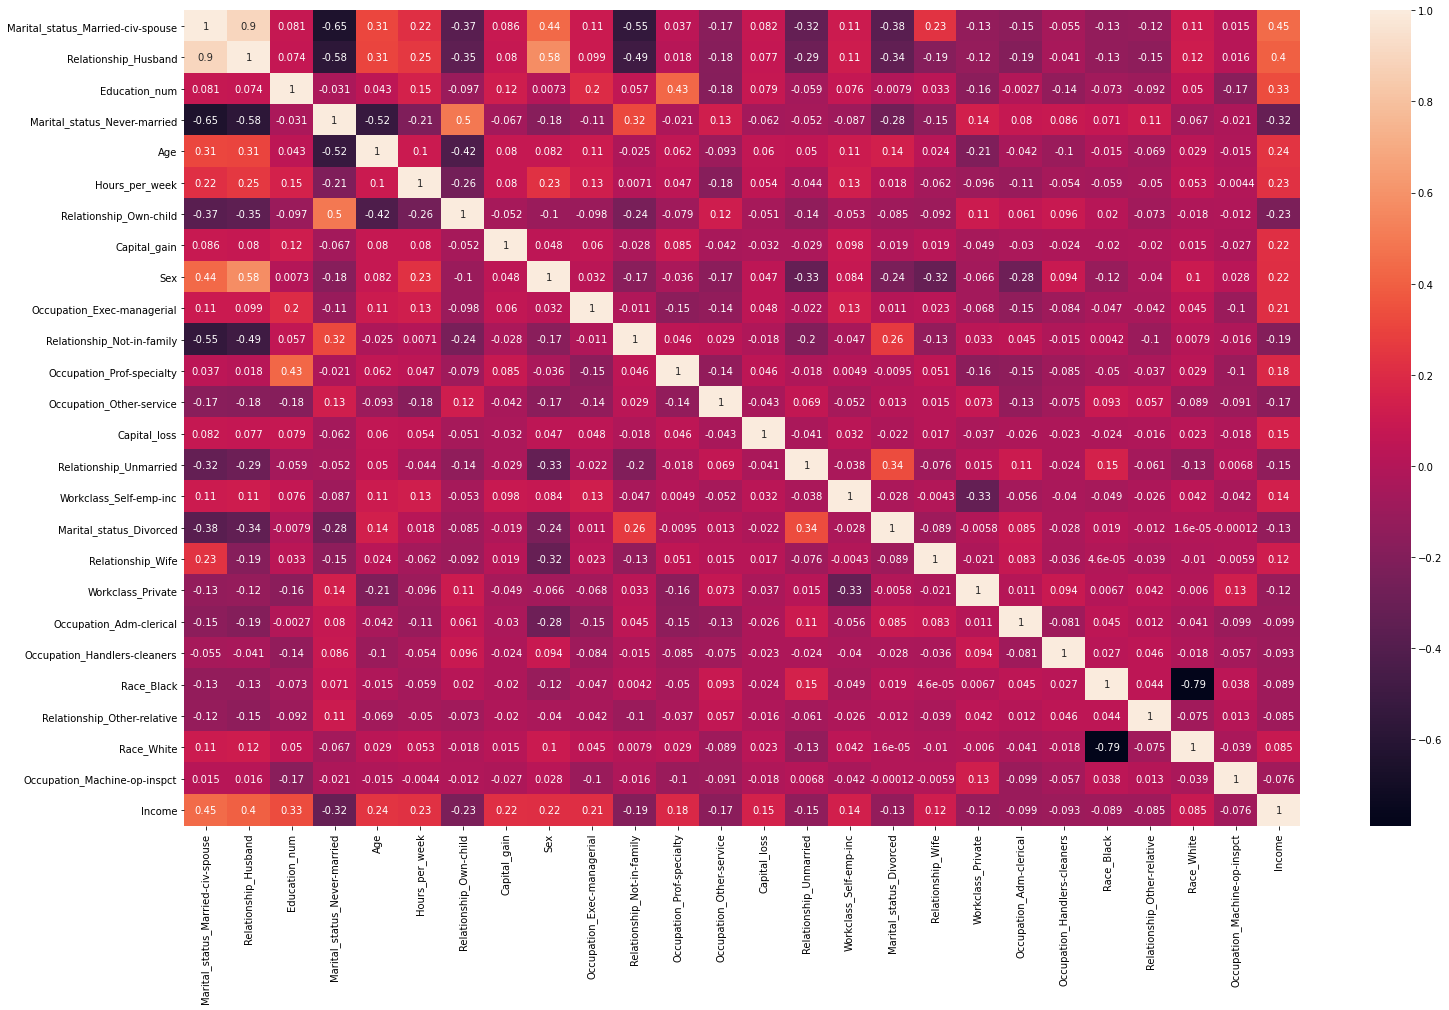

In [39]:
plt.figure(figsize=[25,15])

sns.heatmap(data.corr(),annot=True)

Since we have already applied feature selection, here we can see its showing target relationship positive/negative with all the features.
No Multicollinearity found except 1 feature i.e. around 905. so here we are not removing it.

Most of the features are qualitative so not checking for data distribution.

In [40]:
pd.set_option('display.max_columns',26)

### Describe Dataset

In [41]:
data.describe()

,Marital_status_Married-civ-spouse,Relationship_Husband,Education_num,Marital_status_Never-married,Age,Hours_per_week,Relationship_Own-child,Capital_gain,Sex,Occupation_Exec-managerial,Relationship_Not-in-family,Occupation_Prof-specialty,Occupation_Other-service,Capital_loss,Relationship_Unmarried,Workclass_Self-emp-inc,Marital_status_Divorced,Relationship_Wife,Workclass_Private,Occupation_Adm-clerical,Occupation_Handlers-cleaners,Race_Black,Relationship_Other-relative,Race_White,Occupation_Machine-op-inspct,Income
count,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000
mean,0.466979,0.413710,10.131463,0.322386,38.447594,40.952791,0.147297,1106.867136,0.676767,0.132441,0.255791,0.134754,0.107223,88.982634,0.106539,0.036360,0.138664,0.046753,0.738703,0.122732,0.044603,0.094712,0.029909,0.856189,0.065161,0.249177
std,0.498917,0.492506,2.561269,0.467398,13.115368,11.984561,0.354408,7500.850126,0.467719,0.338975,0.436312,0.341466,0.309402,405.814442,0.308531,0.187188,0.345601,0.211113,0.439349,0.328134,0.206434,0.292822,0.170339,0.350904,0.246815,0.432544
min,0.000000,0.000000,1.000000,0.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,0.000000,28.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,10.000000,0.000000,37.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,13.000000,1.000000,47.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,16.000000,1.000000,90.000000,99.000000,1.000000,99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4356.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


dataset looks good, most of the features are qualitative.
all features have equal count it means no null value.

### BoxPlot-outlier Testing

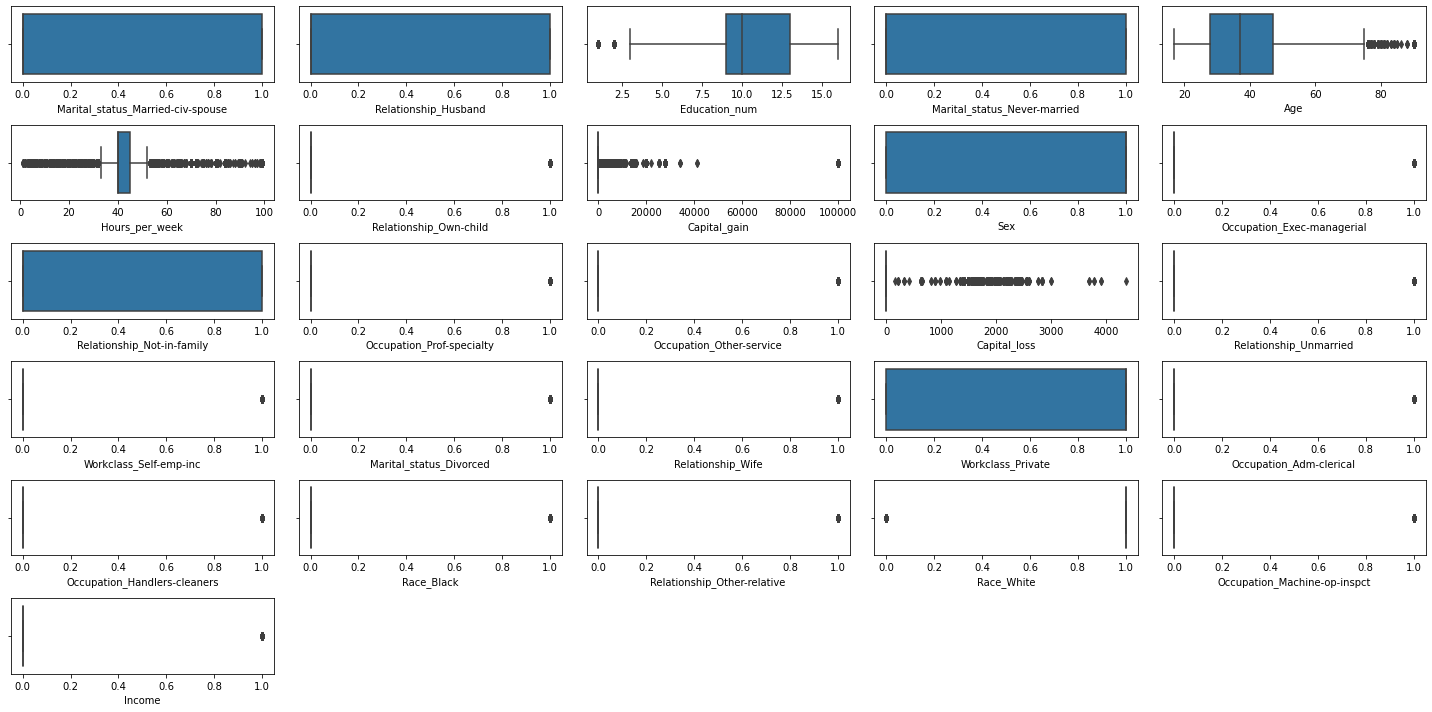

In [42]:
plt.figure(figsize=(20,10))

plotnumber=1

for col in data:
    if plotnumber<=26:
        ax=plt.subplot(6,5,plotnumber)
        sns.boxplot(data[col])
        
    plotnumber+=1
    
plt.tight_layout()

calpital gain/capital loss maxium values are 0 so updated numbers are showing as an outliers.

In [43]:
data.skew()

Marital_status_Married-civ-spouse     0.132378
Relationship_Husband                  0.350435
Education_num                        -0.307909
Marital_status_Never-married          0.760061
Age                                   0.530406
Hours_per_week                        0.333282
Relationship_Own-child                1.990506
Capital_gain                         11.781068
Sex                                  -0.755917
Occupation_Exec-managerial            2.168795
Relationship_Not-in-family            1.119495
Occupation_Prof-specialty             2.139422
Occupation_Other-service              2.539109
Capital_loss                          4.512230
Relationship_Unmarried                2.550709
Workclass_Self-emp-inc                4.954071
Marital_status_Divorced               2.091199
Relationship_Wife                     4.294147
Workclass_Private                    -1.086691
Occupation_Adm-clerical               2.299626
Occupation_Handlers-cleaners          4.412324
Race_Black   

### Data Imbalancing Test

<AxesSubplot:xlabel='Income', ylabel='count'>

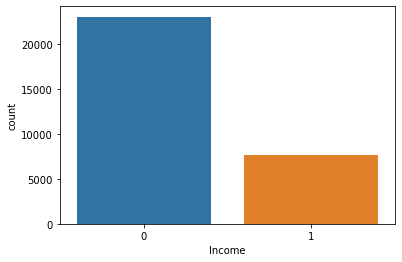

In [44]:
sns.countplot(data['Income'])

Data is imbalance data with label1 is very less , so we have to perform sampling to balance it.

In [69]:
print('0 category %:',round(23045/(30693)*100))
print('1 category %:',round(7648/(30693)*100))

0 category %: 75
1 category %: 25


In [70]:
from sklearn.utils import resample

In [72]:
data1=data[data['Income']==1]
data0=data[data['Income']==0]

In [75]:
sam_data1=resample(data1,n_samples=23045)

In [82]:
data=pd.concat([data0,sam_data1])

<AxesSubplot:xlabel='Income', ylabel='count'>

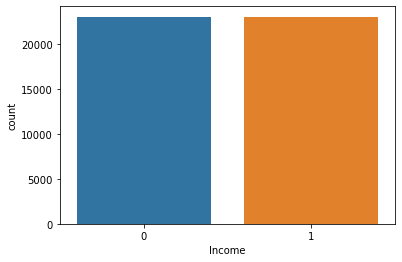

In [84]:
sns.countplot(data['Income'])

Dataset is well balanced now, we can proceed now for model building.

### Split Data

In [85]:
#dataset split

X=data.drop(columns=['Income'])
y=data.Income

### Scaling

In [86]:
scale=StandardScaler()
x_scale=scale.fit_transform(X)

### Train Test Split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.20,random_state=91)

### Model Building

In [88]:
lr=LogisticRegression()
rfc=RandomForestClassifier()
svm=SVC()

In [89]:
lr.fit(x_train,y_train)
rfc.fit(x_train,y_train)
svm.fit(x_train,y_train)

SVC()

In [90]:
#lr score

y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

81.24321978737254


In [91]:
#rfr score

y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

90.9958776307225


In [92]:
#svm score

y_pred=svm.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

81.95921024083316


### Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
print('Logistic Regression score:',np.mean(cross_val_score(lr,x_scale,y))*100)

print('Random Forest score:',np.mean(cross_val_score(rfc,x_scale,y))*100)

print('SVM score:',np.mean(cross_val_score(svm,x_scale,y))*100)

Logistic Regression score: 81.39075721414623
Random Forest score: 90.83966153178564
SVM score: 82.60360164894772


Random Forest classification producing best score, so we will go with random forest. 

### Evaluation

In [99]:
y_pred=rfc.predict(x_test)
print('Accuracy score for Random Forest :', accuracy_score(y_test,y_pred)*100)

print(classification_report(y_test,y_pred))

Accuracy score for Random Forest : 90.9958776307225
              precision    recall  f1-score   support

           0       0.95      0.86      0.91      4583
           1       0.88      0.96      0.91      4635

    accuracy                           0.91      9218
   macro avg       0.91      0.91      0.91      9218
weighted avg       0.91      0.91      0.91      9218



### Model accuracy is around 91% . and its generalized model.

### Hyperparametertunning

In [102]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
params={'n_estimators':[20,40,60,100],
        'criterion':['gini','entropy'],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[1,3,5,8],
        }

In [107]:
rcv=RandomizedSearchCV(rfc,param_distributions=params)

In [108]:
rcv.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [1, 3, 5, 8],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [20, 40, 60, 100]})

In [110]:
rcv.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'criterion': 'gini'}

In [123]:
rfc=RandomForestClassifier(criterion= 'gini',
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators= 80)


rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

91.15860273378173


we tried hyper parameter tunning & able to increase score in fractions. final score is 91.15%

### Final Scoring

In [124]:
confusion_matrix(y_test,y_pred)

array([[3959,  624],
       [ 191, 4444]], dtype=int64)

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91      4583
           1       0.88      0.96      0.92      4635

    accuracy                           0.91      9218
   macro avg       0.92      0.91      0.91      9218
weighted avg       0.92      0.91      0.91      9218



### AUC ROC Curve

In [126]:
from sklearn.metrics import plot_roc_curve

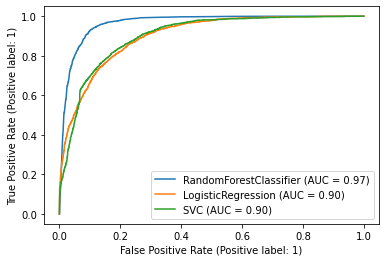

In [128]:
disp=plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)

In ROC curve it showing best best model is RandomForest with AUC-97.

### Model Save

In [130]:
filename='Census_income.pickle'
pickle.dump(rfc,open(filename,'wb'))